<a href="https://colab.research.google.com/github/samyff12/Sales.Analysis/blob/main/EF_tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Econometría Financiera

## Samuel Francisco ID 1062508


### Paquetes

In [1]:
install.packages('fredr')
install.packages('dplyr')
install.packages('tibble')
install.packages('ggplot2')
install.packages('zoo')
install.packages('cowplot')
install.packages('astsa')
install.packages('gridExtra')
install.packages('grid')
install.packages('tidyr')
install.packages('stargazer')
install.packages('Hmisc')
install.packages('reshape2')
install.packages('data.table')
# install.packages('grid')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
# Librerías
library(fredr)
library(purrr)
library(dplyr)
library(ggplot2)
library(zoo)
library(cowplot)
library(astsa)
library(gridExtra)
library(grid)
library(tidyr)
library(stargazer)
library(Hmisc)
library(readxl)
library(reshape2)
library(data.table)

In [33]:
# options(repr.plot.width = 15, repr.plot.height = 12)

#ignorar warnings
oldw <- getOption("warn")
options(warn = -1)

# volver a ver warnings
## options(warn = oldw)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [4]:
options(repr.plot.width = 20, repr.plot.height = 10)

In [ ]:

# Importando datos del FRED

# data_oil <- fredr(
#   series_id = "DCOILWTICO",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d",
#   realtime_start = NULL
# )

# data_sp500 <- fredr(
#   series_id = "SP500",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

# data_vix <- fredr(
#   series_id = "VIXCLS",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

### <h2> Ejercicio 1

Un gerente bancario ha decidido invertir el excedente trimestral de sus operaciones en una divisa segura durante los próximos dos meses. En tal sentido, le ha solicitado, de entre los siguientes países, realizar una comparación del riesgo, usando los datos diarios de los siguientes países: México, Perú, Colombia, Rep. Dom., Costa Rica, Brasil, en el periodo 2015-2019.

In [17]:
df <- read_excel('/content/tasas.xlsx', sheet = 1)
df1 <- melt(df, id.vars='date')

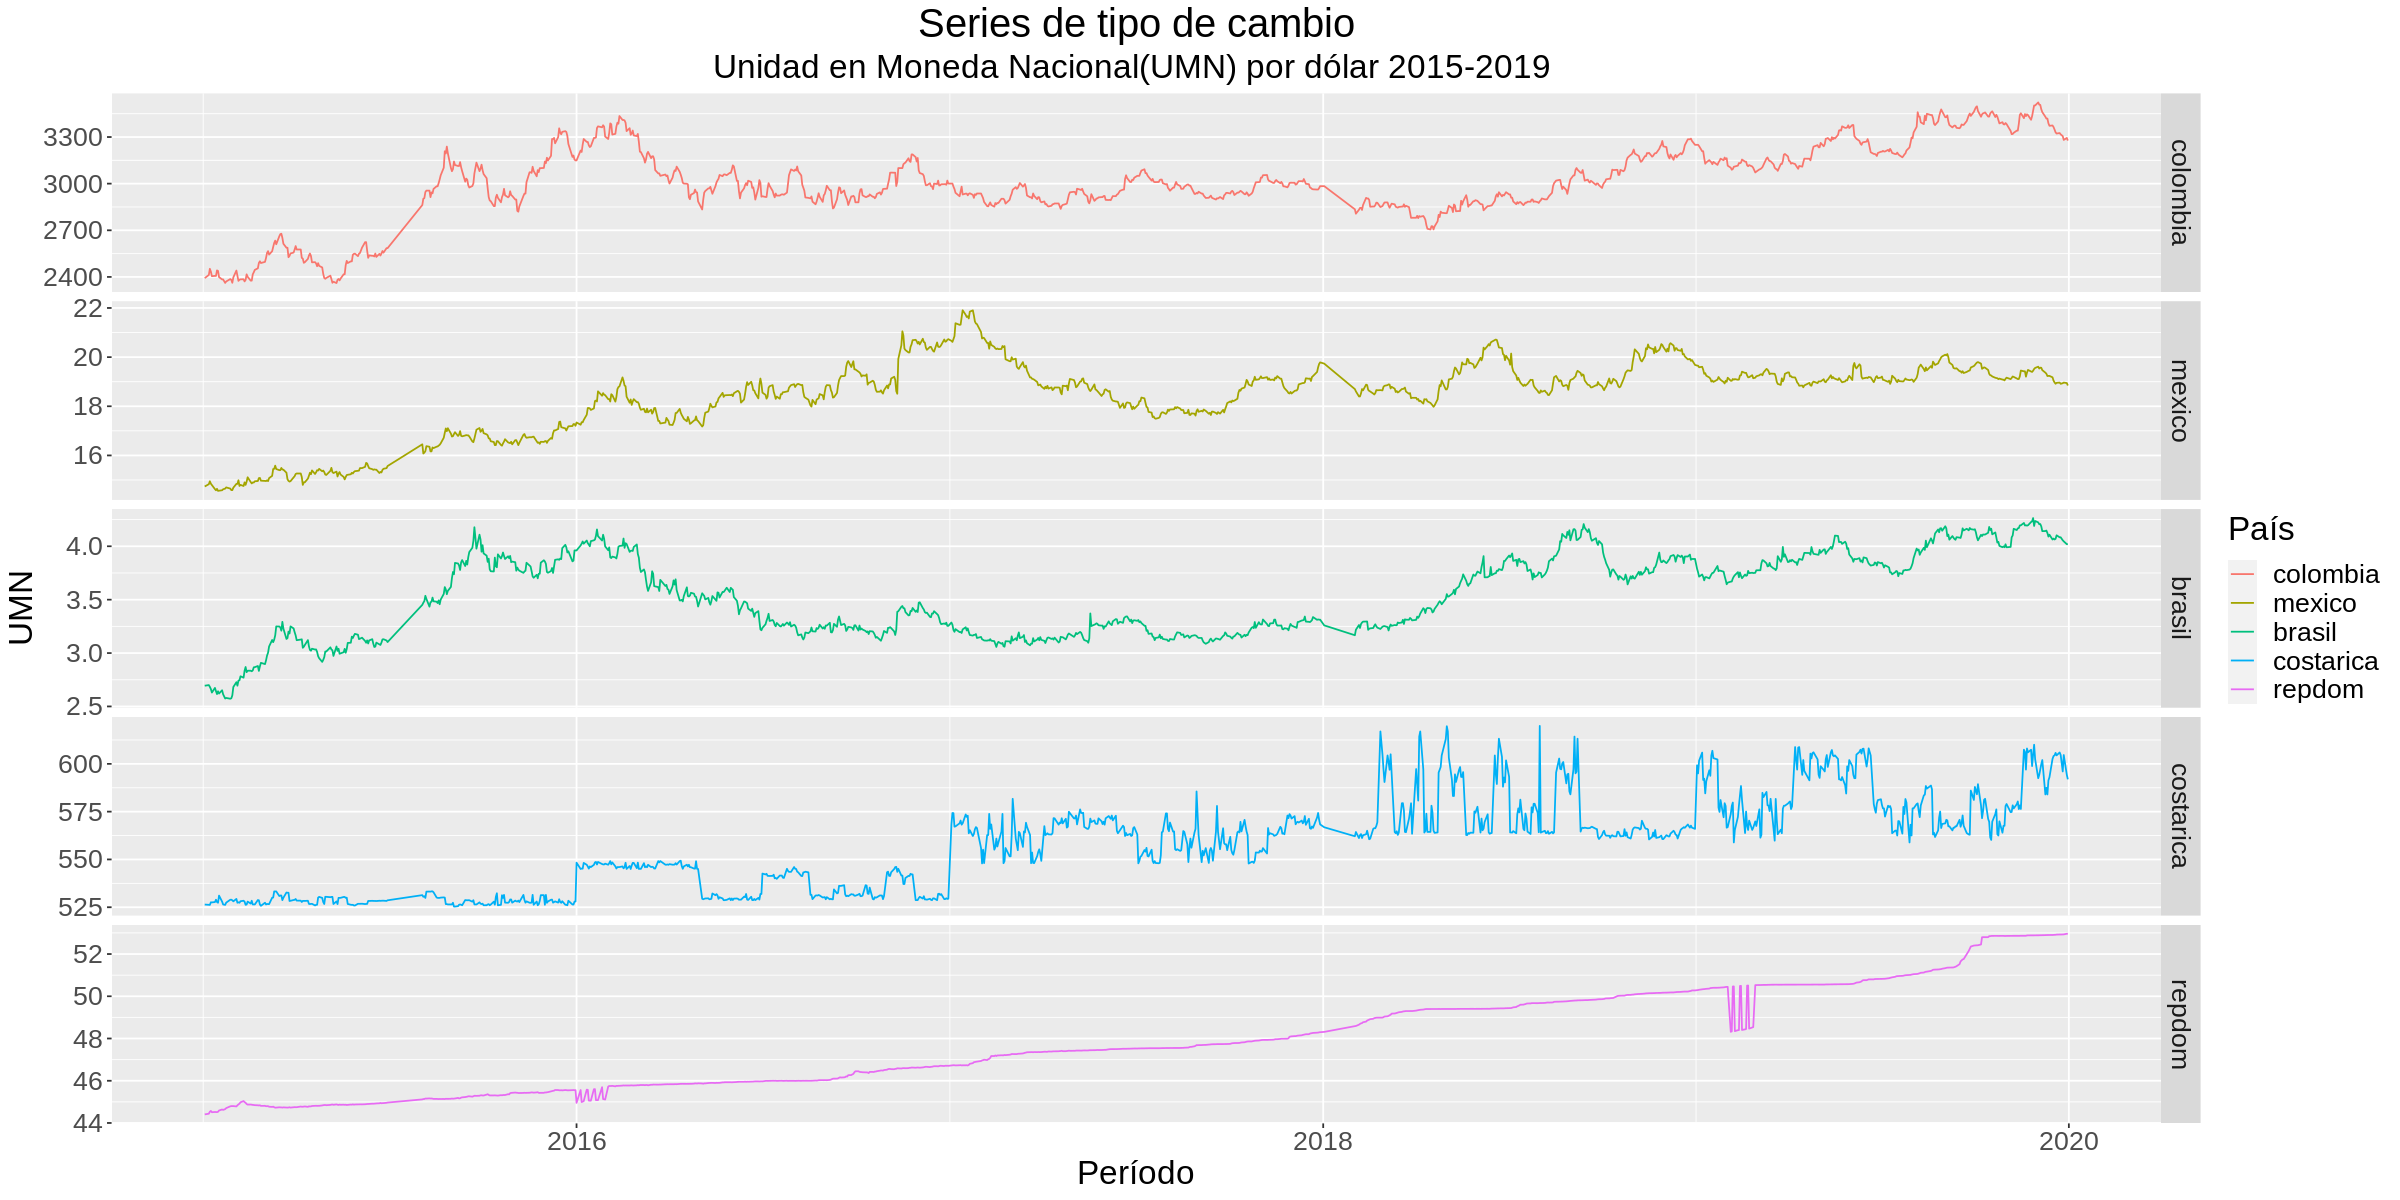

In [24]:
#### 1.1.Obtenga una representación temporal del nivel y tasa de variación de los países.
df1 %>% ggplot(aes(x = date, y = value, color = variable)) +
          geom_line() +
          labs(title="Series de tipo de cambio", subtitle="Unidad en Moneda Nacional(UMN) por dólar 2015-2019 ", x = "Período", y = "UMN", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(variable ~ ., scales="free_y") 



In [ ]:
# df1 <- df1 %>%  group_by(variable) %>% dplyr::mutate(rt=(value-lag(value, 1)))
df1 %>% ggplot(aes(x = date, y = rt, color = variable)) +
          geom_line() +
          labs(title="Series de variaciones de tipo de cambio", subtitle="Unidad en Moneda Nacional(UMN) por dólar 2015-2019 ", x = "Período", y = "UMN", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(rt ~ ., scales="free_y") 

In [49]:
head(shift(df1$value, 1))

[1]      NA 2392.46 2412.82 2452.11 2434.31 2405.03

In [36]:
head(df1$value)

[1] 2392.46 2412.82 2452.11 2434.31 2405.03 2406.71

In [ ]:
data_wti <- datos %>% filter(series_id == "DCOILWTICO") %>% select(date,value)
data_sp <- datos %>% filter(series_id == "SP500") %>% select(date,value)
data_vix <- datos %>% filter(series_id == "VIXCLS") %>% select(date,value)

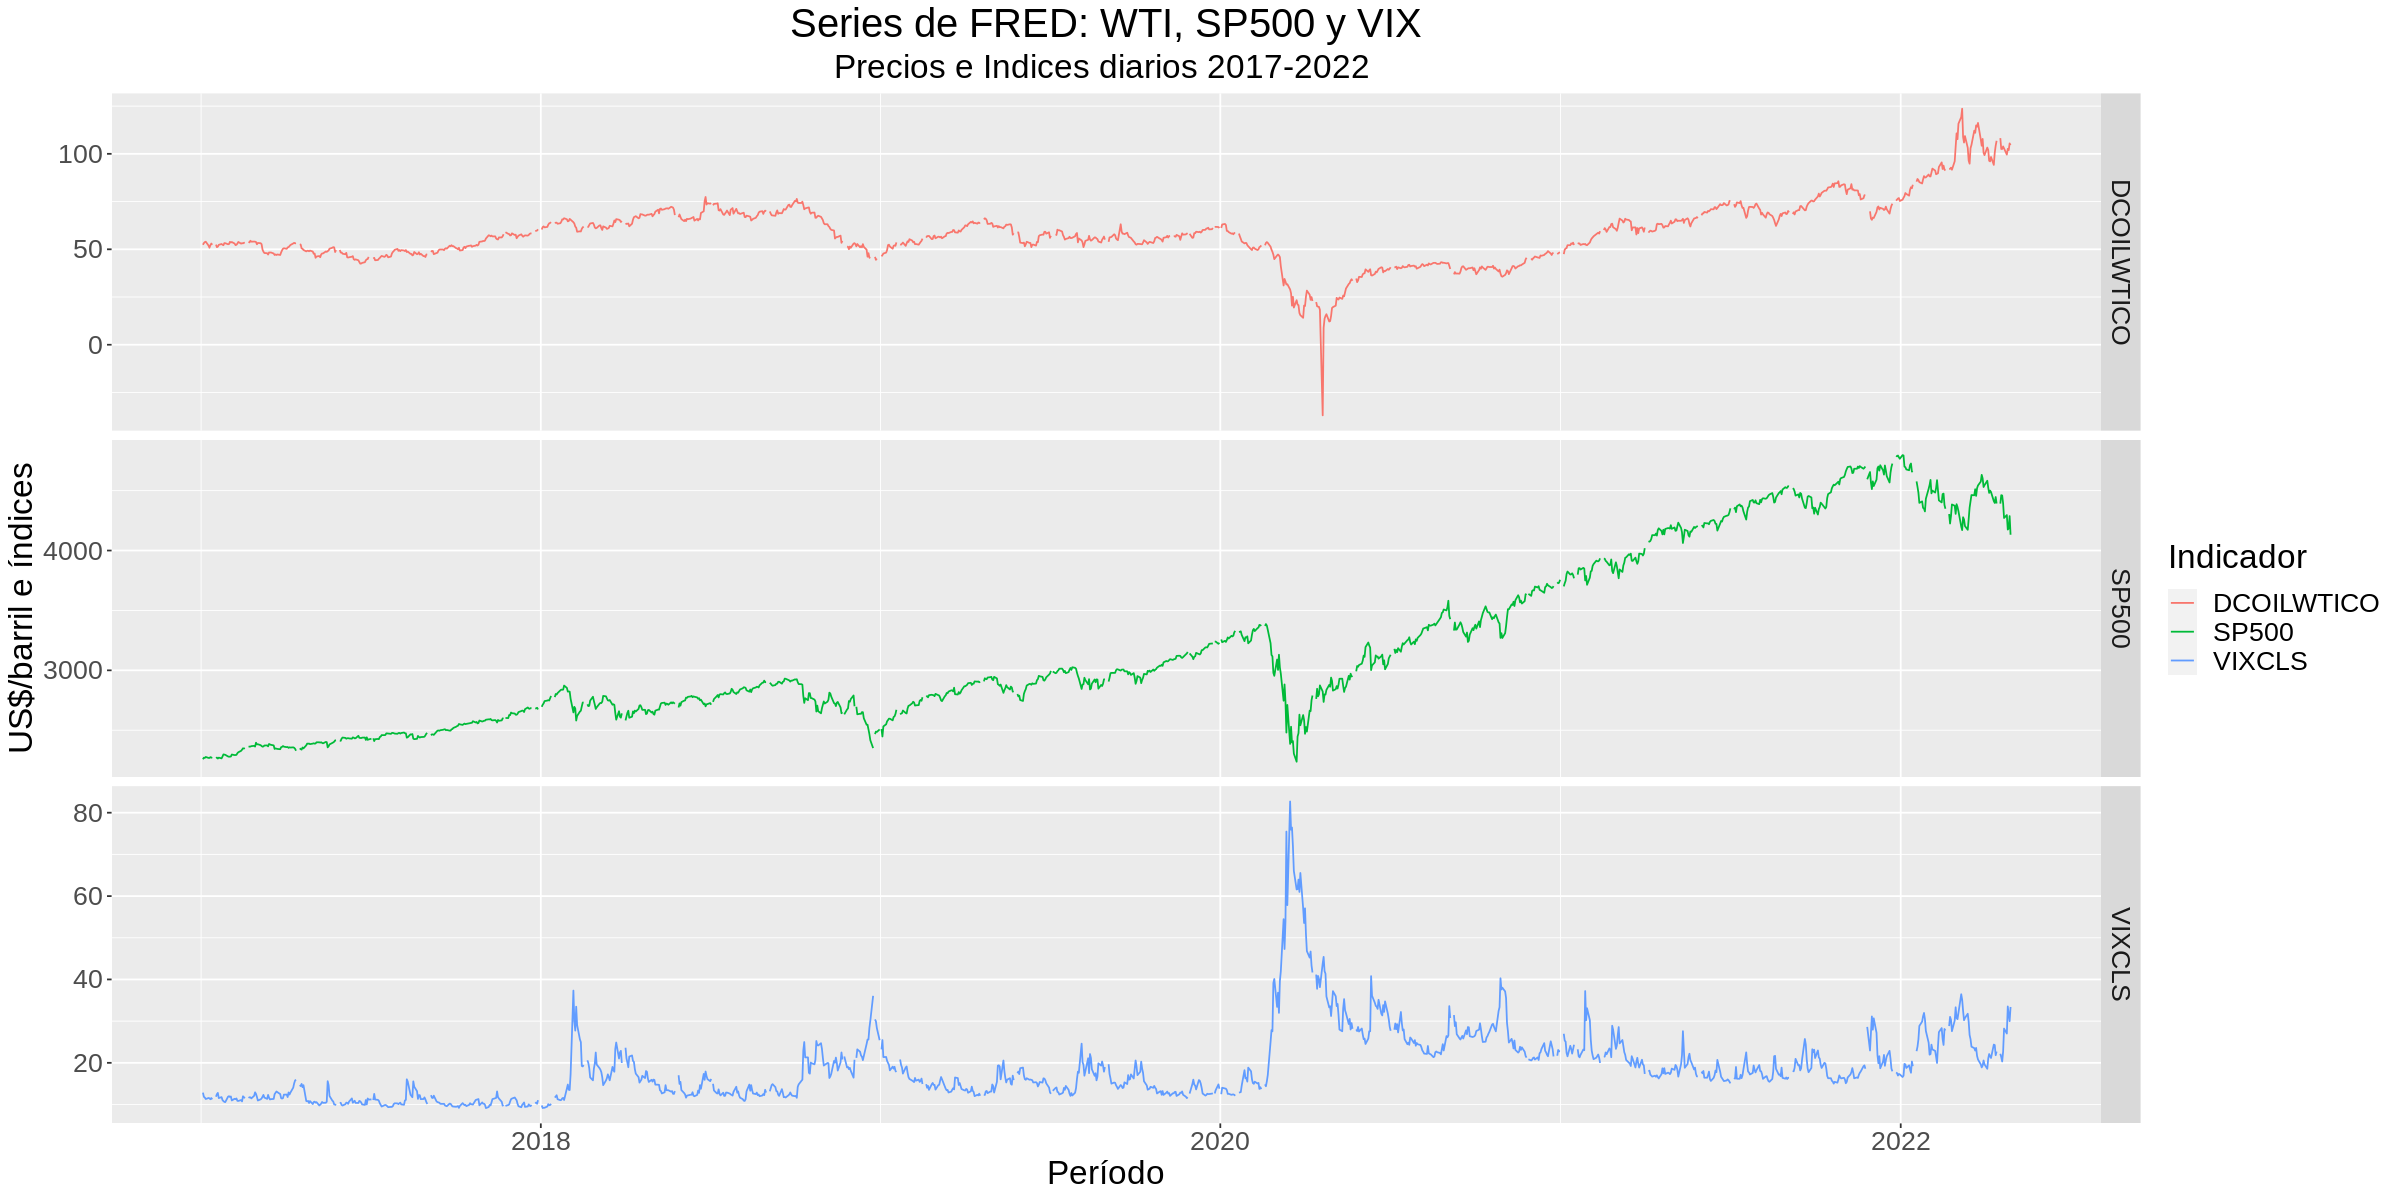

In [ ]:
datos %>% ggplot(aes(x = date, y = value, color = series_id)) +
          geom_line() +
          labs(title="Series de FRED: WTI, SP500 y VIX", subtitle="Precios e Indices diarios 2017-2022 ", x = "Período", y = "US$/barril e índices", color = "Indicador") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(series_id ~ ., scales="free_y") 




Vemos que el precio del petróleo presentó un comportamiento relativamente estable oscilando los 50US$ por barril desde el 2017 hasta el período de la pandemia, donde después de una caída sustancial producto de la crisis, adquiere una tendencia alcista hasta el presente.

El SP500 muestra un comportamiento alcista desde 2017, manteniéndose incluso después del período pandémico en 2020-2021.

Respecto al índice de volatilidad, esta muestra la expectativa a corto plazo de la volatilidad del mercado de valores estadounidense. Muestra un índice que oscila alrededor de 20, para luego alcanzar un máximo por encima de 80 en pandemia. En períodos post-pandémicos regresa a su comportamiento habitual. 